In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE, r2_score

from sklearn.model_selection import cross_val_score

from sklearn.svm import SVR

from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor

from IPython.display import set_matplotlib_formats, display, HTML
import os
from ipywidgets import interact,widgets

from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'

SEED = 1

In [119]:
data = pd.read_csv('./files/Zelestra-temperature-forecasting-train.csv',parse_dates=["Datetime"])
pd.concat([data.head(20), data.tail(20)]) # show the first and last 10 rows of the data

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
0,0,01/01/17 14:00,0,14.0,40.12,85,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84,-0.323
1,1,01/01/17 15:00,0,12.0,65.59,84,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45,-0.570
2,2,01/01/17 16:00,0,6.0,58.87,83,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44,-1.008
3,3,01/01/17 17:00,0,5.0,84.67,84,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27,-1.234
4,4,01/01/17 18:00,0,5.0,83.66,77,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93,-1.704
5,5,01/01/17 19:00,0,3.0,21.69,77,2481.99,55.21,1027.5,-21.3,0.0,23.70,2.4,69.01,-2.222
6,6,01/01/17 20:00,0,4.0,76,62,577.18,55.86,1028.2,-20.4,0.0,23.39,2.2,69.91,-2.381
7,7,01/01/17 21:00,0,7.0,23.99,48,1980.23,86.75,1029.5,-20.4,0.0,38.53,3.0,72.48,-1.316
8,8,01/01/17 22:00,0,6.0,51.71,46,742.59,111.49,1030.4,-21.2,0.0,28.94,4.6,82.66,-0.136
9,9,01/01/17 23:00,0,14.0,53.9,68,2405.1,116.58,1030.5,-23.3,0.0,29.75,5.5,40.24,0.489


In [120]:
data.describe() # show the summary statistics of the data

,ID,City_ID,Particulate_matter,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
count,56000.000000,56000.000000,55340.000000,56000.000000,56000.000000,56000.000000,56000.000000,55784.000000,56000.000000,56000.000000,56000.000000
mean,31521.500000,0.500000,110.548066,143.438337,1012.431143,1.940343,0.055943,49.601420,1.899418,45.653169,13.578780
std,19296.643919,0.500004,95.174784,76.744127,10.121543,13.731029,0.687729,24.989324,1.324907,17.302524,11.251614
min,0.000000,0.000000,2.000000,2.000000,987.100000,-35.300000,0.000000,0.000000,0.000000,15.000000,-16.779000
25%,13999.750000,0.000000,39.000000,80.367500,1004.275000,-9.200000,0.000000,31.020000,1.000000,32.940000,3.446750
50%,31521.500000,0.500000,88.000000,153.380000,1012.100000,2.100000,0.000000,49.520000,1.500000,44.100000,14.531000
75%,49043.250000,1.000000,152.000000,210.780000,1020.600000,14.500000,0.000000,67.190000,2.500000,59.332500,23.045000
max,63043.000000,1.000000,995.000000,269.990000,1042.000000,28.800000,36.600000,99.990000,10.500000,85.000000,41.272000


In [121]:
data.info() # show the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56000 non-null  int64  
 1   Datetime            56000 non-null  object 
 2   City_ID             56000 non-null  int64  
 3   Particulate_matter  55340 non-null  float64
 4   SO2_concentration   56000 non-null  object 
 5   O3_concentration    55198 non-null  object 
 6   CO_concentration    56000 non-null  object 
 7   NO2_concentration   56000 non-null  float64
 8   Presure             56000 non-null  float64
 9   Dew_point           56000 non-null  float64
 10  Precipitation       56000 non-null  float64
 11  Anonymous_X1        55784 non-null  float64
 12  Wind_speed          56000 non-null  float64
 13  Moisture_percent    56000 non-null  float64
 14  Temperature         56000 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 6.4+

In [122]:
for col in data.columns:
    if col == 'Datetime':
        data[col] = pd.to_datetime(data[col], errors='coerce')
        print('Datetime column')
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce')   
data.isna().sum() # show the number of missing values in each column   

Datetime column


ID                      0
Datetime              106
City_ID                 0
Particulate_matter    660
SO2_concentration      47
O3_concentration      913
CO_concentration       60
NO2_concentration       0
Presure                 0
Dew_point               0
Precipitation           0
Anonymous_X1          216
Wind_speed              0
Moisture_percent        0
Temperature             0
dtype: int64

In [123]:
temperature_df = data.dropna(axis=0,inplace=False)
temperature_df.isna().sum() # show the number of missing values in each column    

ID                    0
Datetime              0
City_ID               0
Particulate_matter    0
SO2_concentration     0
O3_concentration      0
CO_concentration      0
NO2_concentration     0
Presure               0
Dew_point             0
Precipitation         0
Anonymous_X1          0
Wind_speed            0
Moisture_percent      0
Temperature           0
dtype: int64

In [124]:
temperature_df.describe(exclude='number') # show the summary statistics of the data

,Datetime
count,54493
mean,2018-08-11 10:22:18.050758912
min,2017-01-01 14:00:00
25%,2017-10-19 04:00:00
50%,2018-08-07 12:00:00
75%,2019-05-25 17:00:00
max,2020-12-03 23:00:00


In [125]:
reduced_temperature_df = temperature_df.drop(['Datetime','City_ID','ID'],axis=1,inplace=False) # drop the columns that are not needed
reduced_temperature_df.tail() # show the last 5 rows of the data

,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
55995,103.0,232.74,128.0,6075.55,240.01,1004.3,4.4,0.0,60.33,2.1,16.09,26.747
55996,75.0,241.44,154.0,6080.48,254.33,1003.3,4.2,0.0,37.42,2.3,20.69,28.004
55997,63.0,220.01,172.0,5974.36,233.80,1002.6,5.1,0.0,45.96,2.4,26.70,28.215
55998,60.0,206.98,170.0,5741.71,263.99,1002.1,5.9,0.0,42.24,3.2,39.27,27.864
55999,64.0,210.63,165.0,4780.37,251.07,1001.8,6.2,0.0,63.39,3.0,36.53,27.461


In [126]:
X = temperature_df.drop(['Datetime','City_ID','ID','Temperature'],axis=1,inplace=False)
Y = temperature_df['Temperature']

In [127]:
def get_dtypes(data,drop_col=[]):
    """Return the dtypes for each column of a pandas Dataframe

    Parameters
    ----------
    data : pandas Dataframe

    drop_col : columns to omit in a list

    Returns
    -------
    str_var_list, num_var_list, all_var_list
    
    """

    name_of_col = list(data.columns)
    num_var_list = []
    str_var_list = []
    all_var_list = []

    str_var_list = name_of_col.copy()
    for var in name_of_col:
        # check if column belongs to numeric type
        if (data[var].dtypes in (int, np.int64, np.uint, np.int32, float,
                               np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
    # drop the omit column from list
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        if var in num_var_list:
            num_var_list.remove(var)

    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    return str_var_list, num_var_list, all_var_list

In [128]:
str_var_list, num_var_list, all_var_list = get_dtypes(data=X)
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

[]
['Particulate_matter', 'SO2_concentration', 'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure', 'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed', 'Moisture_percent']
['Particulate_matter', 'SO2_concentration', 'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure', 'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed', 'Moisture_percent']


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)   

In [130]:
X_train.head() # show the first 5 rows of the training data

,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent
23384,17.0,76.82,20.0,2796.18,101.78,1029.2,-3.7,0.0,32.47,1.0,57.65
22325,165.0,190.45,2.0,4493.73,198.57,1014.2,15.5,0.0,57.98,1.0,61.18
52117,548.0,79.03,4.0,868.36,4.71,1019.3,-1.4,0.0,41.80,1.1,70.47
35901,222.0,50.76,7.0,730.20,70.27,1010.5,-10.9,0.0,22.24,1.2,82.71
13970,71.0,124.38,44.0,2577.94,127.97,1012.8,13.6,0.0,58.85,2.3,56.59


In [131]:
lr = LinearRegression()
print(f"Linear regression parameters: {lr.get_params()}") # show the parameters of the linear regression model

params_lr = {
'copy_X': [True, False],
'fit_intercept': [True, False],
'n_jobs': [None, 1, 2, 3, 4, 5],
'positive': [True, False],
}

ridgeReg = Ridge(random_state=SEED,copy_X=True,max_iter=None,fit_intercept=True,solver='auto')
# ridgeReg = Ridge(random_state=SEED)
print(f"Ridge regression parameters: {ridgeReg.get_params()}") # show the parameters of the ridge regression model 

params_ridge = {
                'alpha': arange(100, 1000, 100),
                #  'copy_X': [True, False],
                # 'fit_intercept': [True, False],
                # 'max_iter': arange(100, 20000, 100),
                'positive': [True, False],
                # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
                # 'solver': ['sag', 'saga', 'lbfgs'],
                # 'tol': [0.001, 0.01, 0.1, 1]
                }





lassoReg = Lasso(random_state=SEED,alpha= 0.001)

print(f"Lasso regression parameters: {lassoReg.get_params()}") # show the parameters of the lasso regression model

params_lassoReg = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 20, 50, 100],
    # 'copy_X': [True, False],
    # 'fit_intercept': [True, False],
    # # 'max_iter': [None, 1, 2, 3, 4, 5],
    # 'positive': [True, False],
    # 'precompute': [True, False],
    # 'selection': ['cyclic', 'random'],
    # # 'tol': [0.001, 0.01, 0.1, 1],
    # 'warm_start': [True, False]
}









regressor_labels = [('Linear regression', 'lr'),
 ('Ridge regression', 'ridgeReg'),

('Lasso regression', 'lassoReg'),


]



Linear regression parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Ridge regression parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 1, 'solver': 'auto', 'tol': 0.0001}
Lasso regression parameters: {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [132]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [133]:
@interact
def Analyze_Regressor(regression_model=regressor_labels):
    print(f"Regressor: {regression_model}")
    if regression_model == 'lr':
        regressor = LinearRegression()
        params = params_lr
    elif regression_model == 'ridgeReg':
        regressor = ridgeReg
        params = params_ridge
    elif regression_model == 'lassoReg':
        regressor = lassoReg
        params = params_lassoReg
    
    grid = GridSearchCV(estimator=regressor, param_grid=params, cv=10, n_jobs=-1)
    grid.fit(X_train, Y_train)
    best_params = grid.best_params_
    print(f"Best parameters: {best_params}")
    best_score = grid.best_score_
    print(f"Best score: {best_score}")
    best_estimator = grid.best_estimator_
    print(f"Best estimator: {best_estimator}")
    Y_pred = best_estimator.predict(X_test)
    mse = MSE(Y_test, Y_pred)
    print(f"Mean squared error: {mse}")
    r2 = r2_score(Y_test, Y_pred)
    print(f"R2 score: {r2}")
    plt.figure(figsize=(16, 8))

    residuals = Y_test - Y_pred
    # plt.scatter(Y_pred, residuals)

    plt.scatter(range(len(residuals)) , residuals, color='blue')
    # plt.scatter(Y_pred , residuals, color='blue')
    # plt.scatter(range(len(Y_test)) , Y_test, color='blue')
    # plt.scatter(range(len(Y_pred)) , Y_pred, color='red')
    
    plt.xlabel("Actual temperature")
    plt.ylabel("Predicted temperature")
    plt.title("Actual vs Predicted temperature")
    plt.show()

interactive(children=(Dropdown(description='regression_model', options=(('Linear regression', 'lr'), ('Ridge r…

In [134]:
regression_model = [('Linear regression', lr),
 ('Ridge regression', ridgeReg),

('Lasso regression', lassoReg),


]

In [135]:

# for regressor_name, regressor in regressors:
@interact
def Analyze_Regressor_CV(regressor=regression_model):
    # Evaluate the list of MSE ontained by 10-fold CV
    # Set n_jobs to -1 in order to exploit all CPU cores in computation
    MSE_CV = - cross_val_score(regressor, X_train, Y_train, cv= 10,scoring='neg_mean_squared_error',n_jobs = -1)
    # Fit 'regressor' to the training set
    regressor.fit(X_train, Y_train)

    print(f"Training R Squared {regressor.score(X_train, Y_train)}")

    print(f"Testing R Squared {regressor.score(X_test, Y_test)}")

    # Predict the labels of training set
    y_predict_train = regressor.predict(X_train)
    # Predict the labels of test set
    y_predict_test = regressor.predict(X_test)

    
    # CV MSE - mean
    print('CV MSE(mean): {:.2f}'.format(MSE_CV.mean()))

     # CV MSE - std
    print('CV MSE(std): {:.2f}'.format(np.std(MSE_CV)))

     # CV MSE -quantile
    print('CV MSE(Quantile):  {:.2f}'.format(np.quantile(MSE_CV,0.50,axis=0)))

    # Training set MSE
    print('Train MSE: {:.2f}'.format(MSE(Y_train, y_predict_train)))

    # Test set MSE
    print('Test MSE: {:.2f}'.format(MSE(Y_test, y_predict_test)))

    print(f"Training R Squared {r2_score(Y_train, y_predict_train)}") 
    print(f"Testing R Squared {r2_score(Y_test, y_predict_test)}") 

    residuals = Y_test - y_predict_test
    # plt.scatter(Y_pred, residuals)

    plt.figure(figsize=(16, 8))

    plt.scatter(range(len(residuals)) , residuals, color='blue')
    # plt.scatter(Y_pred , residuals, color='blue')
    # plt.scatter(range(len(Y_test)) , Y_test, color='blue')
    # plt.scatter(range(len(Y_pred)) , Y_pred, color='red')
    
    plt.xlabel("Actual temperature")
    plt.ylabel("Predicted temperature")
    plt.title("Actual vs Predicted temperature")
    plt.show()


interactive(children=(Dropdown(description='regressor', options=(('Linear regression', LinearRegression()), ('…

Voting Classifier: 2.946


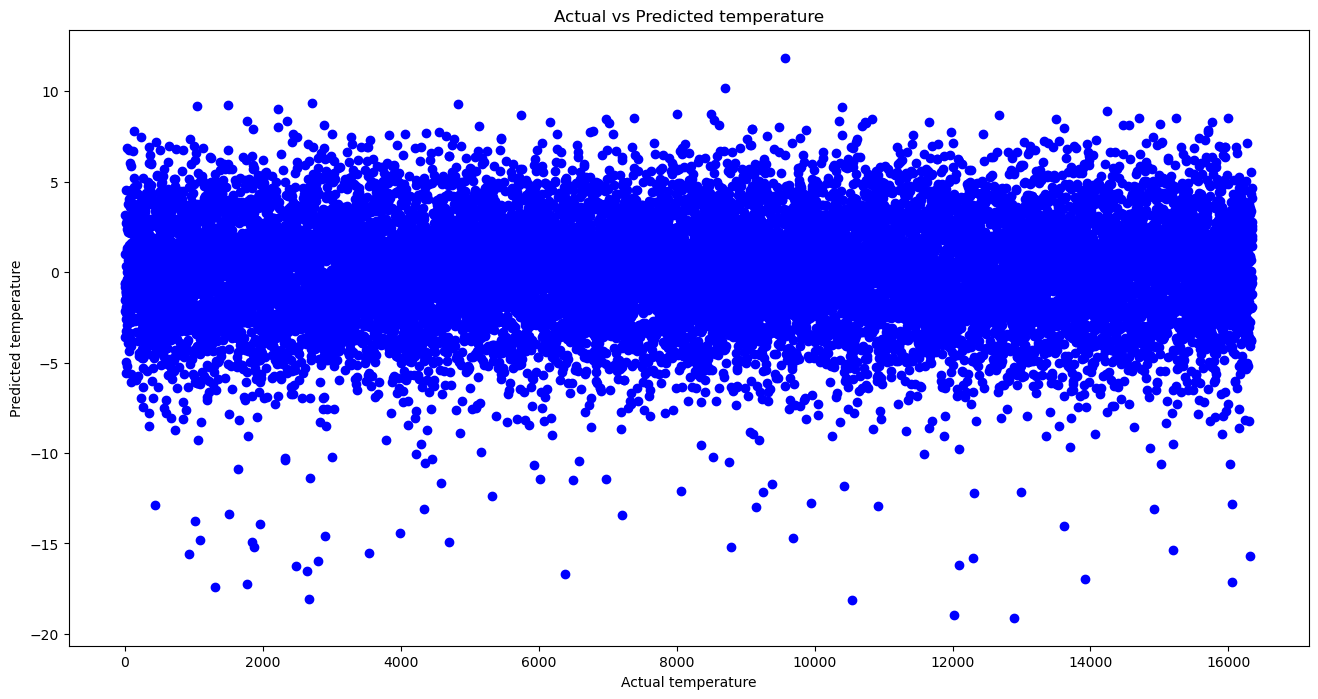

In [138]:
# Instantiate a VotingClassifier 'vc'
vc = VotingRegressor(estimators=regression_model)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, Y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(MSE(Y_test, y_pred,squared=False)))

residuals = Y_test - y_pred
    # plt.scatter(Y_pred, residuals)

plt.figure(figsize=(16, 8))

plt.scatter(range(len(residuals)) , residuals, color='blue')
    # plt.scatter(Y_pred , residuals, color='blue')
    # plt.scatter(range(len(Y_test)) , Y_test, color='blue')
    # plt.scatter(range(len(Y_pred)) , Y_pred, color='red')
    
plt.xlabel("Actual temperature")
plt.ylabel("Predicted temperature")
plt.title("Actual vs Predicted temperature")
plt.show()

In [137]:
# for regressor_name, regressor in regressors:\
# for regressor_name, regressor in regressors:
@interact
def Analyze_BaggingRegressor_CV(regressor=regression_model):
    br = BaggingRegressor(estimator=regressor,
                        n_estimators=10, oob_score=True, random_state=0)
    br.fit(X_train, Y_train)
    
    print(f"Training R Squared {br.score(X_train, Y_train)}")

    print(f"Testing R Squared {br.score(X_test, Y_test)}")

    y_pred = br.predict(X_test)
    mse = MSE(Y_test, y_pred)
    rmse = mse**(1/2)
    print(f"R Squared: {r2_score(Y_test, y_pred)}")
    print(f"Root mean squared error: {rmse}")
    print('OOB accuracy: {:.3f}'.format(br.oob_score_))

    residuals = Y_test - y_pred
    # plt.scatter(Y_pred, residuals)

    plt.figure(figsize=(16, 8))

    plt.scatter(range(len(residuals)) , abs(residuals), color='blue')
    # plt.scatter(Y_pred , residuals, color='blue')
    # plt.scatter(range(len(Y_test)) , Y_test, color='blue')
    # plt.scatter(range(len(Y_pred)) , Y_pred, color='red')
    
    plt.xlabel("Actual temperature")
    plt.ylabel("Predicted temperature")
    plt.title("Actual vs Predicted temperature")
    plt.show()

    

interactive(children=(Dropdown(description='regressor', options=(('Linear regression', LinearRegression()), ('…

In [139]:
# for regressor_name, regressor in regressors:
@interact
def Analyze_AdaBoostRegressor_CV(regressor=regression_model):
    adb_clf = AdaBoostRegressor(estimator =regressor, n_estimators=100)
    adb_clf.fit(X_train, Y_train)
    print(f"Training R Squared {adb_clf.score(X_train, Y_train)}")

    print(f"Testing R Squared {adb_clf.score(X_test, Y_test)}")

    y_pred = adb_clf.predict(X_test)
    mse = MSE(Y_test, y_pred)
    rmse = mse**(1/2)
    print(f"R Squared: {r2_score(Y_test, y_pred)}")
    print(f"Root mean squared error: {rmse}")

interactive(children=(Dropdown(description='regressor', options=(('Linear regression', LinearRegression()), ('…

In [140]:
svr = SVR()
print(f"Support vector regression parameters: {svr.get_params()}") # show the parameters of the support vector regression model

Support vector regression parameters: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [141]:
dt = DecisionTreeRegressor(max_depth = 4,random_state=SEED)
print(f"Decision tree parameters: {dt.get_params()}") # show the parameters of the decision tree model


params_dt = {
'max_depth': [3, 4,5, 6, 7, 8,10,12,13,14],
# 'min_samples_leaf': [0.04, 0.06, 0.08, 0.1],
'max_features': [0.2, 0.4,0.6, 0.8, 1]
}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,
scoring='neg_mean_squared_error',
cv=10,
n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, Y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
train_acc = best_model.score(X_train,Y_train)

# Print test set accuracy
print("Train set accuracy of best model: {:.3f}".format(train_acc))


# Evaluate test set accuracy
test_acc = best_model.score(X_test,Y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

y_predict_train = best_model.predict(X_train)

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(Y_train, y_predict_train)))

y_predict_test = best_model.predict(X_test)

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(Y_test, y_predict_test)))


print(f"Testing R Squared {r2_score(Y_test, y_predict_test)}") 


Decision tree parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}
Best hyerparameters:
 {'max_depth': 12, 'max_features': 0.8}
Train set accuracy of best model: 0.975
Test set accuracy of best model: 0.967
Best CV accuracy
Train MSE: 3.19
Test MSE: 4.18
Testing R Squared 0.9673212342980136


In [ ]:
rf = RandomForestRegressor(max_depth = 4,random_state=SEED)
print(f"Random forest parameters: {rf.get_params()}") # show the parameters of the random forest model

params_rf = {
'n_estimators': [300, 400, 500],
'max_depth': [3, 4,5, 6, 7, 8,10,12,13,14],
'min_samples_leaf': [0.1, 0.2],
'max_features': ['log2', 'sqrt']
}
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
param_grid=params_rf,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, Y_train)

# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(Y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/home/izzumani/meine_projects/Meine_ML_Exercise/venv/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}
Test set RMSE of rf: 3.37


In [ ]:
gbt = GradientBoostingRegressor( random_state=SEED)
print(f"Gradient boosting parameters: {gbt.get_params()}") # show the parameters of the gradient boosting model

In [ ]:
# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(random_state=SEED)
print(f"Stochastic Gradient boosting parameters: {sgbt.get_params()}") # show the parameters of the stochastic gradient boosting model